In [20]:
#https://www.facebook.com/groups/deep.learning.edu/permalink/608757449485792/
import numpy
import pandas
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


In [21]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


In [22]:
# load dataset
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]


In [97]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
print(encoded_Y)
print("Seperate")
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
print(dummy_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Seperate
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 

In [94]:
# define baseline model
def baseline_model():
	# create model
    model=Sequential()
    model.add(Dense(8, activation='relu', input_shape=(4,)))
    #model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='softmax')) #probablity for softmax

	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [95]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


ValueError: Error when checking target: expected dense_670 to have shape (2,) but got array with shape (3,)

In [57]:
# smaller model
def create_smaller():
	# create model
    model=Sequential()
    model.add(Dense(4, activation='relu', input_shape=(4,)))
    #model.add(Dense(4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
	# Compile model, write code below
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


estimator = KerasClassifier(build_fn=create_smaller, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Results: 94.00% (10.09%)


Train on 135 samples, validate on 15 samples
Epoch 1/200
135/135 [==============================] - 6s 48ms/step - loss: 1.2204 - acc: 0.3333 - val_loss: 1.2972 - val_acc: 0.3333
Epoch 2/200
135/135 [==============================] - 0s 1ms/step - loss: 1.1142 - acc: 0.4741 - val_loss: 1.2083 - val_acc: 0.4667
Epoch 3/200
135/135 [==============================] - 0s 1ms/step - loss: 1.0352 - acc: 0.6815 - val_loss: 1.1471 - val_acc: 0.4667
Epoch 4/200
135/135 [==============================] - 0s 1ms/step - loss: 0.9966 - acc: 0.6815 - val_loss: 1.1018 - val_acc: 0.4667
Epoch 5/200
135/135 [==============================] - 0s 1ms/step - loss: 0.9662 - acc: 0.6815 - val_loss: 1.0726 - val_acc: 0.4667
Epoch 6/200
135/135 [==============================] - 0s 1ms/step - loss: 0.9362 - acc: 0.6815 - val_loss: 1.0365 - val_acc: 0.4667
Epoch 7/200
135/135 [==============================] - 0s 1ms/step - loss: 0.9079 - acc: 0.6815 - val_loss: 1.0033 - val_acc: 0.4667
Epoch 8/200
135/135 [==

Epoch 62/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3158 - acc: 0.9704 - val_loss: 0.3568 - val_acc: 0.9333
Epoch 63/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3119 - acc: 0.9630 - val_loss: 0.3614 - val_acc: 0.9333
Epoch 64/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3093 - acc: 0.9704 - val_loss: 0.3595 - val_acc: 0.9333
Epoch 65/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3075 - acc: 0.9407 - val_loss: 0.3534 - val_acc: 0.9333
Epoch 66/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3025 - acc: 0.9556 - val_loss: 0.3455 - val_acc: 0.9333
Epoch 67/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2960 - acc: 0.9630 - val_loss: 0.3535 - val_acc: 0.9333
Epoch 68/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2951 - acc: 0.9630 - val_loss: 0.3371 - val_acc: 0.9333
Epoch 69/200
135/135 [==============================] - 0s 1ms

Epoch 123/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1602 - acc: 0.9778 - val_loss: 0.1981 - val_acc: 1.0000
Epoch 124/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1600 - acc: 0.9630 - val_loss: 0.1917 - val_acc: 1.0000
Epoch 125/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1575 - acc: 0.9778 - val_loss: 0.1927 - val_acc: 1.0000
Epoch 126/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1570 - acc: 0.9778 - val_loss: 0.1826 - val_acc: 1.0000
Epoch 127/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1542 - acc: 0.9778 - val_loss: 0.1907 - val_acc: 1.0000
Epoch 128/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1531 - acc: 0.9778 - val_loss: 0.1820 - val_acc: 1.0000
Epoch 129/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1516 - acc: 0.9778 - val_loss: 0.1856 - val_acc: 1.0000
Epoch 130/200
135/135 [==============================] 

135/135 [==============================] - 0s 1ms/step - loss: 0.1085 - acc: 0.9778 - val_loss: 0.1210 - val_acc: 1.0000
Epoch 184/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1068 - acc: 0.9778 - val_loss: 0.1281 - val_acc: 1.0000
Epoch 185/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1067 - acc: 0.9778 - val_loss: 0.1302 - val_acc: 1.0000
Epoch 186/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1096 - acc: 0.9630 - val_loss: 0.1244 - val_acc: 1.0000
Epoch 187/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1045 - acc: 0.9778 - val_loss: 0.1275 - val_acc: 1.0000
Epoch 188/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1051 - acc: 0.9778 - val_loss: 0.1314 - val_acc: 1.0000
Epoch 189/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1031 - acc: 0.9778 - val_loss: 0.1184 - val_acc: 1.0000
Epoch 190/200
135/135 [==============================] - 0s 1ms/step 

135/135 [==============================] - 0s 2ms/step - loss: 0.2310 - acc: 0.9704 - val_loss: 0.2985 - val_acc: 1.0000
Epoch 44/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2239 - acc: 0.9630 - val_loss: 0.2881 - val_acc: 1.0000
Epoch 45/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2197 - acc: 0.9778 - val_loss: 0.2846 - val_acc: 1.0000
Epoch 46/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2161 - acc: 0.9778 - val_loss: 0.2857 - val_acc: 1.0000
Epoch 47/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2181 - acc: 0.9778 - val_loss: 0.2911 - val_acc: 0.9333
Epoch 48/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2153 - acc: 0.9778 - val_loss: 0.2869 - val_acc: 0.9333
Epoch 49/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2061 - acc: 0.9778 - val_loss: 0.2768 - val_acc: 1.0000
Epoch 50/200
135/135 [==============================] - 0s 1ms/step - loss:

135/135 [==============================] - 0s 1ms/step - loss: 0.1049 - acc: 0.9778 - val_loss: 0.1634 - val_acc: 1.0000
Epoch 105/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1052 - acc: 0.9778 - val_loss: 0.1619 - val_acc: 1.0000
Epoch 106/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1050 - acc: 0.9630 - val_loss: 0.1608 - val_acc: 1.0000
Epoch 107/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1021 - acc: 0.9778 - val_loss: 0.1580 - val_acc: 1.0000
Epoch 108/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1016 - acc: 0.9778 - val_loss: 0.1624 - val_acc: 1.0000
Epoch 109/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1007 - acc: 0.9778 - val_loss: 0.1602 - val_acc: 1.0000
Epoch 110/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1020 - acc: 0.9778 - val_loss: 0.1643 - val_acc: 1.0000
Epoch 111/200
135/135 [==============================] - 0s 2ms/step 

Epoch 165/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0737 - acc: 0.9778 - val_loss: 0.1330 - val_acc: 0.9333
Epoch 166/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0797 - acc: 0.9704 - val_loss: 0.1325 - val_acc: 0.9333
Epoch 167/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0741 - acc: 0.9778 - val_loss: 0.1329 - val_acc: 1.0000
Epoch 168/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0725 - acc: 0.9778 - val_loss: 0.1309 - val_acc: 0.9333
Epoch 169/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0727 - acc: 0.9778 - val_loss: 0.1353 - val_acc: 1.0000
Epoch 170/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0798 - acc: 0.9704 - val_loss: 0.1307 - val_acc: 0.9333
Epoch 171/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0715 - acc: 0.9778 - val_loss: 0.1355 - val_acc: 1.0000
Epoch 172/200
135/135 [==============================] 

135/135 [==============================] - 0s 2ms/step - loss: 0.9729 - acc: 0.7407 - val_loss: 0.9610 - val_acc: 0.6000
Epoch 26/200
135/135 [==============================] - 0s 2ms/step - loss: 0.9641 - acc: 0.7407 - val_loss: 0.9506 - val_acc: 0.6667
Epoch 27/200
135/135 [==============================] - 0s 2ms/step - loss: 0.9527 - acc: 0.7481 - val_loss: 0.9392 - val_acc: 0.6000
Epoch 28/200
135/135 [==============================] - 0s 1ms/step - loss: 0.9408 - acc: 0.7704 - val_loss: 0.9280 - val_acc: 0.6667
Epoch 29/200
135/135 [==============================] - 0s 1ms/step - loss: 0.9299 - acc: 0.7704 - val_loss: 0.9157 - val_acc: 0.6667
Epoch 30/200
135/135 [==============================] - 0s 1ms/step - loss: 0.9175 - acc: 0.7926 - val_loss: 0.9024 - val_acc: 0.7333
Epoch 31/200
135/135 [==============================] - 0s 2ms/step - loss: 0.9052 - acc: 0.7852 - val_loss: 0.8882 - val_acc: 0.7333
Epoch 32/200
135/135 [==============================] - 0s 1ms/step - loss:

135/135 [==============================] - 0s 1ms/step - loss: 0.3566 - acc: 0.9407 - val_loss: 0.3225 - val_acc: 1.0000
Epoch 87/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3496 - acc: 0.9407 - val_loss: 0.3196 - val_acc: 1.0000
Epoch 88/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3460 - acc: 0.9407 - val_loss: 0.3102 - val_acc: 1.0000
Epoch 89/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3397 - acc: 0.9556 - val_loss: 0.3119 - val_acc: 1.0000
Epoch 90/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3363 - acc: 0.9556 - val_loss: 0.3064 - val_acc: 1.0000
Epoch 91/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3315 - acc: 0.9556 - val_loss: 0.2988 - val_acc: 1.0000
Epoch 92/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3279 - acc: 0.9556 - val_loss: 0.2970 - val_acc: 1.0000
Epoch 93/200
135/135 [==============================] - 0s 1ms/step - loss:

Epoch 147/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1782 - acc: 0.9630 - val_loss: 0.1397 - val_acc: 1.0000
Epoch 148/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1770 - acc: 0.9630 - val_loss: 0.1351 - val_acc: 1.0000
Epoch 149/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1763 - acc: 0.9556 - val_loss: 0.1426 - val_acc: 1.0000
Epoch 150/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1766 - acc: 0.9630 - val_loss: 0.1285 - val_acc: 1.0000
Epoch 151/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1717 - acc: 0.9630 - val_loss: 0.1325 - val_acc: 1.0000
Epoch 152/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1706 - acc: 0.9556 - val_loss: 0.1361 - val_acc: 1.0000
Epoch 153/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1705 - acc: 0.9556 - val_loss: 0.1265 - val_acc: 1.0000
Epoch 154/200
135/135 [==============================] 

Epoch 7/200
135/135 [==============================] - 0s 1ms/step - loss: 1.1882 - acc: 0.4370 - val_loss: 1.2052 - val_acc: 0.4667
Epoch 8/200
135/135 [==============================] - 0s 1ms/step - loss: 1.0361 - acc: 0.4815 - val_loss: 1.0079 - val_acc: 0.4667
Epoch 9/200
135/135 [==============================] - 0s 1ms/step - loss: 0.9353 - acc: 0.4889 - val_loss: 0.9009 - val_acc: 0.6000
Epoch 10/200
135/135 [==============================] - 0s 1ms/step - loss: 0.8821 - acc: 0.6222 - val_loss: 0.8419 - val_acc: 1.0000
Epoch 11/200
135/135 [==============================] - 0s 1ms/step - loss: 0.8549 - acc: 0.8222 - val_loss: 0.7865 - val_acc: 1.0000
Epoch 12/200
135/135 [==============================] - 0s 1ms/step - loss: 0.8208 - acc: 0.7556 - val_loss: 0.7663 - val_acc: 0.9333
Epoch 13/200
135/135 [==============================] - 0s 1ms/step - loss: 0.7883 - acc: 0.8222 - val_loss: 0.7261 - val_acc: 1.0000
Epoch 14/200
135/135 [==============================] - 0s 2ms/st

135/135 [==============================] - 0s 1ms/step - loss: 0.2676 - acc: 0.9778 - val_loss: 0.1679 - val_acc: 1.0000
Epoch 69/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2704 - acc: 0.9556 - val_loss: 0.1654 - val_acc: 1.0000
Epoch 70/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2655 - acc: 0.9481 - val_loss: 0.1591 - val_acc: 1.0000
Epoch 71/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2605 - acc: 0.9630 - val_loss: 0.1603 - val_acc: 1.0000
Epoch 72/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2557 - acc: 0.9926 - val_loss: 0.1515 - val_acc: 1.0000
Epoch 73/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2475 - acc: 0.9778 - val_loss: 0.1530 - val_acc: 1.0000
Epoch 74/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2463 - acc: 0.9630 - val_loss: 0.1456 - val_acc: 1.0000
Epoch 75/200
135/135 [==============================] - 0s 1ms/step - loss:

135/135 [==============================] - 0s 1ms/step - loss: 0.1273 - acc: 0.9778 - val_loss: 0.0487 - val_acc: 1.0000
Epoch 130/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1254 - acc: 0.9778 - val_loss: 0.0484 - val_acc: 1.0000
Epoch 131/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1248 - acc: 0.9704 - val_loss: 0.0475 - val_acc: 1.0000
Epoch 132/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1240 - acc: 0.9778 - val_loss: 0.0474 - val_acc: 1.0000
Epoch 133/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1231 - acc: 0.9704 - val_loss: 0.0468 - val_acc: 1.0000
Epoch 134/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1229 - acc: 0.9704 - val_loss: 0.0443 - val_acc: 1.0000
Epoch 135/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1239 - acc: 0.9704 - val_loss: 0.0437 - val_acc: 1.0000
Epoch 136/200
135/135 [==============================] - 0s 1ms/step 

Epoch 190/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0895 - acc: 0.9704 - val_loss: 0.0201 - val_acc: 1.0000
Epoch 191/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0912 - acc: 0.9778 - val_loss: 0.0201 - val_acc: 1.0000
Epoch 192/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0903 - acc: 0.9704 - val_loss: 0.0196 - val_acc: 1.0000
Epoch 193/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0906 - acc: 0.9852 - val_loss: 0.0200 - val_acc: 1.0000
Epoch 194/200
135/135 [==============================] - 0s 3ms/step - loss: 0.0891 - acc: 0.9630 - val_loss: 0.0192 - val_acc: 1.0000
Epoch 195/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0890 - acc: 0.9704 - val_loss: 0.0192 - val_acc: 1.0000
Epoch 196/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0905 - acc: 0.9852 - val_loss: 0.0186 - val_acc: 1.0000
Epoch 197/200
135/135 [==============================] 

Epoch 50/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3297 - acc: 0.9704 - val_loss: 0.2722 - val_acc: 1.0000
Epoch 51/200
135/135 [==============================] - 0s 2ms/step - loss: 0.3204 - acc: 0.9630 - val_loss: 0.2668 - val_acc: 1.0000
Epoch 52/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3158 - acc: 0.9778 - val_loss: 0.2638 - val_acc: 1.0000
Epoch 53/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3092 - acc: 0.9778 - val_loss: 0.2585 - val_acc: 1.0000
Epoch 54/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3046 - acc: 0.9778 - val_loss: 0.2546 - val_acc: 1.0000
Epoch 55/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2998 - acc: 0.9778 - val_loss: 0.2497 - val_acc: 1.0000
Epoch 56/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2946 - acc: 0.9778 - val_loss: 0.2453 - val_acc: 1.0000
Epoch 57/200
135/135 [==============================] - 0s 2ms

135/135 [==============================] - 0s 1ms/step - loss: 0.1526 - acc: 0.9778 - val_loss: 0.1107 - val_acc: 1.0000
Epoch 112/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1484 - acc: 0.9778 - val_loss: 0.1093 - val_acc: 1.0000
Epoch 113/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1488 - acc: 0.9778 - val_loss: 0.1078 - val_acc: 1.0000
Epoch 114/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1486 - acc: 0.9778 - val_loss: 0.1068 - val_acc: 1.0000
Epoch 115/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1449 - acc: 0.9778 - val_loss: 0.1053 - val_acc: 1.0000
Epoch 116/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1469 - acc: 0.9852 - val_loss: 0.1038 - val_acc: 1.0000
Epoch 117/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1470 - acc: 0.9778 - val_loss: 0.1026 - val_acc: 1.0000
Epoch 118/200
135/135 [==============================] - 0s 1ms/step 

Epoch 172/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1034 - acc: 0.9852 - val_loss: 0.0598 - val_acc: 1.0000
Epoch 173/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1009 - acc: 0.9852 - val_loss: 0.0595 - val_acc: 1.0000
Epoch 174/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1026 - acc: 0.9778 - val_loss: 0.0586 - val_acc: 1.0000
Epoch 175/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1012 - acc: 0.9778 - val_loss: 0.0585 - val_acc: 1.0000
Epoch 176/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1009 - acc: 0.9778 - val_loss: 0.0578 - val_acc: 1.0000
Epoch 177/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1002 - acc: 0.9852 - val_loss: 0.0572 - val_acc: 1.0000
Epoch 178/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1034 - acc: 0.9704 - val_loss: 0.0567 - val_acc: 1.0000
Epoch 179/200
135/135 [==============================] 

135/135 [==============================] - 0s 2ms/step - loss: 0.5051 - acc: 0.9037 - val_loss: 0.4502 - val_acc: 1.0000
Epoch 33/200
135/135 [==============================] - 0s 1ms/step - loss: 0.4971 - acc: 0.8815 - val_loss: 0.4401 - val_acc: 1.0000
Epoch 34/200
135/135 [==============================] - 0s 1ms/step - loss: 0.4884 - acc: 0.8963 - val_loss: 0.4322 - val_acc: 1.0000
Epoch 35/200
135/135 [==============================] - 0s 2ms/step - loss: 0.4813 - acc: 0.8889 - val_loss: 0.4252 - val_acc: 1.0000
Epoch 36/200
135/135 [==============================] - 0s 2ms/step - loss: 0.4731 - acc: 0.9185 - val_loss: 0.4197 - val_acc: 1.0000
Epoch 37/200
135/135 [==============================] - 0s 1ms/step - loss: 0.4672 - acc: 0.9037 - val_loss: 0.4101 - val_acc: 1.0000
Epoch 38/200
135/135 [==============================] - 0s 1ms/step - loss: 0.4597 - acc: 0.9185 - val_loss: 0.4074 - val_acc: 1.0000
Epoch 39/200
135/135 [==============================] - 0s 1ms/step - loss:

135/135 [==============================] - 0s 1ms/step - loss: 0.2096 - acc: 0.9704 - val_loss: 0.1519 - val_acc: 1.0000
Epoch 94/200
135/135 [==============================] - 0s 2ms/step - loss: 0.2023 - acc: 0.9630 - val_loss: 0.1498 - val_acc: 1.0000
Epoch 95/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1973 - acc: 0.9630 - val_loss: 0.1456 - val_acc: 1.0000
Epoch 96/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1968 - acc: 0.9630 - val_loss: 0.1486 - val_acc: 1.0000
Epoch 97/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1972 - acc: 0.9556 - val_loss: 0.1390 - val_acc: 1.0000
Epoch 98/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1915 - acc: 0.9630 - val_loss: 0.1485 - val_acc: 0.9333
Epoch 99/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1883 - acc: 0.9704 - val_loss: 0.1419 - val_acc: 1.0000
Epoch 100/200
135/135 [==============================] - 0s 2ms/step - loss

135/135 [==============================] - 0s 1ms/step - loss: 0.1168 - acc: 0.9704 - val_loss: 0.0795 - val_acc: 1.0000
Epoch 154/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1145 - acc: 0.9704 - val_loss: 0.0791 - val_acc: 1.0000
Epoch 155/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1135 - acc: 0.9704 - val_loss: 0.0740 - val_acc: 1.0000
Epoch 156/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1128 - acc: 0.9704 - val_loss: 0.0833 - val_acc: 0.9333
Epoch 157/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1112 - acc: 0.9704 - val_loss: 0.0754 - val_acc: 1.0000
Epoch 158/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1117 - acc: 0.9630 - val_loss: 0.0742 - val_acc: 1.0000
Epoch 159/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1110 - acc: 0.9704 - val_loss: 0.0749 - val_acc: 1.0000
Epoch 160/200
135/135 [==============================] - 0s 2ms/step 

135/135 [==============================] - 0s 1ms/step - loss: 0.8685 - acc: 0.6593 - val_loss: 0.7190 - val_acc: 0.8000
Epoch 14/200
135/135 [==============================] - 0s 1ms/step - loss: 0.8441 - acc: 0.6593 - val_loss: 0.6967 - val_acc: 0.8000
Epoch 15/200
135/135 [==============================] - 0s 1ms/step - loss: 0.8212 - acc: 0.6667 - val_loss: 0.6802 - val_acc: 0.9333
Epoch 16/200
135/135 [==============================] - 0s 1ms/step - loss: 0.7988 - acc: 0.6741 - val_loss: 0.6616 - val_acc: 0.9333
Epoch 17/200
135/135 [==============================] - 0s 1ms/step - loss: 0.7769 - acc: 0.6963 - val_loss: 0.6481 - val_acc: 0.9333
Epoch 18/200
135/135 [==============================] - 0s 1ms/step - loss: 0.7560 - acc: 0.7037 - val_loss: 0.6339 - val_acc: 0.9333
Epoch 19/200
135/135 [==============================] - 0s 2ms/step - loss: 0.7396 - acc: 0.6963 - val_loss: 0.6190 - val_acc: 0.9333
Epoch 20/200
135/135 [==============================] - 0s 2ms/step - loss:

Epoch 74/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2884 - acc: 0.9704 - val_loss: 0.1895 - val_acc: 1.0000
Epoch 75/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2857 - acc: 0.9778 - val_loss: 0.1888 - val_acc: 1.0000
Epoch 76/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2816 - acc: 0.9704 - val_loss: 0.1809 - val_acc: 1.0000
Epoch 77/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2767 - acc: 0.9704 - val_loss: 0.1764 - val_acc: 1.0000
Epoch 78/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2713 - acc: 0.9778 - val_loss: 0.1778 - val_acc: 1.0000
Epoch 79/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2706 - acc: 0.9778 - val_loss: 0.1730 - val_acc: 1.0000
Epoch 80/200
135/135 [==============================] - 0s 1ms/step - loss: 0.2673 - acc: 0.9704 - val_loss: 0.1676 - val_acc: 1.0000
Epoch 81/200
135/135 [==============================] - 0s 1ms

135/135 [==============================] - 0s 1ms/step - loss: 0.1427 - acc: 0.9704 - val_loss: 0.0572 - val_acc: 1.0000
Epoch 135/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1398 - acc: 0.9778 - val_loss: 0.0559 - val_acc: 1.0000
Epoch 136/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1388 - acc: 0.9778 - val_loss: 0.0545 - val_acc: 1.0000
Epoch 137/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1386 - acc: 0.9778 - val_loss: 0.0543 - val_acc: 1.0000
Epoch 138/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1372 - acc: 0.9778 - val_loss: 0.0563 - val_acc: 1.0000
Epoch 139/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1369 - acc: 0.9852 - val_loss: 0.0534 - val_acc: 1.0000
Epoch 140/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1354 - acc: 0.9778 - val_loss: 0.0523 - val_acc: 1.0000
Epoch 141/200
135/135 [==============================] - 0s 1ms/step 

Epoch 195/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0957 - acc: 0.9704 - val_loss: 0.0241 - val_acc: 1.0000
Epoch 196/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0952 - acc: 0.9778 - val_loss: 0.0230 - val_acc: 1.0000
Epoch 197/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0942 - acc: 0.9704 - val_loss: 0.0219 - val_acc: 1.0000
Epoch 198/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0953 - acc: 0.9778 - val_loss: 0.0223 - val_acc: 1.0000
Epoch 199/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0945 - acc: 0.9778 - val_loss: 0.0207 - val_acc: 1.0000
Epoch 200/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0933 - acc: 0.9778 - val_loss: 0.0224 - val_acc: 1.0000
Train on 135 samples, validate on 15 samples
Epoch 1/200
135/135 [==============================] - 8s 56ms/step - loss: 1.8956 - acc: 0.3333 - val_loss: 1.6973 - val_acc: 0.3333
Epoch 2/200

135/135 [==============================] - 0s 1ms/step - loss: 0.3743 - acc: 0.9556 - val_loss: 0.4500 - val_acc: 0.8000
Epoch 56/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3697 - acc: 0.9481 - val_loss: 0.4478 - val_acc: 0.8000
Epoch 57/200
135/135 [==============================] - 0s 2ms/step - loss: 0.3643 - acc: 0.9556 - val_loss: 0.4433 - val_acc: 0.8667
Epoch 58/200
135/135 [==============================] - 0s 2ms/step - loss: 0.3606 - acc: 0.9556 - val_loss: 0.4372 - val_acc: 0.8000
Epoch 59/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3510 - acc: 0.9556 - val_loss: 0.4391 - val_acc: 0.8000
Epoch 60/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3491 - acc: 0.9333 - val_loss: 0.4312 - val_acc: 0.8000
Epoch 61/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3436 - acc: 0.9556 - val_loss: 0.4297 - val_acc: 0.8667
Epoch 62/200
135/135 [==============================] - 0s 1ms/step - loss:

Epoch 116/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1684 - acc: 0.9778 - val_loss: 0.2980 - val_acc: 0.9333
Epoch 117/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1665 - acc: 0.9704 - val_loss: 0.2988 - val_acc: 0.8667
Epoch 118/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1640 - acc: 0.9778 - val_loss: 0.2986 - val_acc: 0.8667
Epoch 119/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1628 - acc: 0.9778 - val_loss: 0.2970 - val_acc: 0.8667
Epoch 120/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1620 - acc: 0.9630 - val_loss: 0.2911 - val_acc: 0.9333
Epoch 121/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1593 - acc: 0.9704 - val_loss: 0.2956 - val_acc: 0.8667
Epoch 122/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1578 - acc: 0.9704 - val_loss: 0.2896 - val_acc: 0.9333
Epoch 123/200
135/135 [==============================] 

135/135 [==============================] - 0s 2ms/step - loss: 0.1066 - acc: 0.9852 - val_loss: 0.2433 - val_acc: 0.9333
Epoch 177/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1065 - acc: 0.9778 - val_loss: 0.2430 - val_acc: 0.9333
Epoch 178/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1059 - acc: 0.9778 - val_loss: 0.2511 - val_acc: 0.9333
Epoch 179/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1068 - acc: 0.9778 - val_loss: 0.2486 - val_acc: 0.9333
Epoch 180/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1048 - acc: 0.9778 - val_loss: 0.2432 - val_acc: 0.9333
Epoch 181/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1073 - acc: 0.9630 - val_loss: 0.2472 - val_acc: 0.9333
Epoch 182/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1027 - acc: 0.9778 - val_loss: 0.2455 - val_acc: 0.9333
Epoch 183/200
135/135 [==============================] - 0s 1ms/step 

135/135 [==============================] - 0s 1ms/step - loss: 0.3581 - acc: 0.9481 - val_loss: 0.3891 - val_acc: 0.9333
Epoch 37/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3499 - acc: 0.9481 - val_loss: 0.3703 - val_acc: 1.0000
Epoch 38/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3426 - acc: 0.9556 - val_loss: 0.3667 - val_acc: 1.0000
Epoch 39/200
135/135 [==============================] - 0s 2ms/step - loss: 0.3353 - acc: 0.9481 - val_loss: 0.3610 - val_acc: 1.0000
Epoch 40/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3280 - acc: 0.9704 - val_loss: 0.3553 - val_acc: 1.0000
Epoch 41/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3225 - acc: 0.9481 - val_loss: 0.3469 - val_acc: 1.0000
Epoch 42/200
135/135 [==============================] - 0s 1ms/step - loss: 0.3171 - acc: 0.9556 - val_loss: 0.3336 - val_acc: 1.0000
Epoch 43/200
135/135 [==============================] - 0s 1ms/step - loss:

135/135 [==============================] - 0s 1ms/step - loss: 0.1338 - acc: 0.9778 - val_loss: 0.1423 - val_acc: 1.0000
Epoch 98/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1332 - acc: 0.9778 - val_loss: 0.1403 - val_acc: 1.0000
Epoch 99/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1333 - acc: 0.9704 - val_loss: 0.1386 - val_acc: 1.0000
Epoch 100/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1314 - acc: 0.9778 - val_loss: 0.1384 - val_acc: 1.0000
Epoch 101/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1303 - acc: 0.9778 - val_loss: 0.1381 - val_acc: 1.0000
Epoch 102/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1290 - acc: 0.9778 - val_loss: 0.1355 - val_acc: 1.0000
Epoch 103/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1269 - acc: 0.9704 - val_loss: 0.1335 - val_acc: 1.0000
Epoch 104/200
135/135 [==============================] - 0s 1ms/step - 

Epoch 158/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0893 - acc: 0.9852 - val_loss: 0.0914 - val_acc: 1.0000
Epoch 159/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0889 - acc: 0.9778 - val_loss: 0.0948 - val_acc: 1.0000
Epoch 160/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0874 - acc: 0.9852 - val_loss: 0.0890 - val_acc: 1.0000
Epoch 161/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0905 - acc: 0.9778 - val_loss: 0.0889 - val_acc: 1.0000
Epoch 162/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0896 - acc: 0.9704 - val_loss: 0.0859 - val_acc: 1.0000
Epoch 163/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0882 - acc: 0.9778 - val_loss: 0.0968 - val_acc: 1.0000
Epoch 164/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0871 - acc: 0.9778 - val_loss: 0.0888 - val_acc: 1.0000
Epoch 165/200
135/135 [==============================] 

Epoch 18/200
135/135 [==============================] - 0s 2ms/step - loss: 0.7070 - acc: 0.6963 - val_loss: 0.7236 - val_acc: 0.6667
Epoch 19/200
135/135 [==============================] - 0s 2ms/step - loss: 0.6792 - acc: 0.7333 - val_loss: 0.6975 - val_acc: 0.6667
Epoch 20/200
135/135 [==============================] - 0s 2ms/step - loss: 0.6506 - acc: 0.7111 - val_loss: 0.6787 - val_acc: 0.6667
Epoch 21/200
135/135 [==============================] - 0s 2ms/step - loss: 0.6259 - acc: 0.8074 - val_loss: 0.6577 - val_acc: 0.7333
Epoch 22/200
135/135 [==============================] - 0s 2ms/step - loss: 0.6057 - acc: 0.8074 - val_loss: 0.6379 - val_acc: 0.7333
Epoch 23/200
135/135 [==============================] - 0s 2ms/step - loss: 0.5904 - acc: 0.8000 - val_loss: 0.6217 - val_acc: 0.7333
Epoch 24/200
135/135 [==============================] - 0s 2ms/step - loss: 0.5692 - acc: 0.8667 - val_loss: 0.6095 - val_acc: 0.8000
Epoch 25/200
135/135 [==============================] - 0s 2ms

135/135 [==============================] - 0s 2ms/step - loss: 0.2074 - acc: 0.9926 - val_loss: 0.3220 - val_acc: 0.8667
Epoch 80/200
135/135 [==============================] - 0s 2ms/step - loss: 0.2027 - acc: 0.9926 - val_loss: 0.3230 - val_acc: 0.8667
Epoch 81/200
135/135 [==============================] - 0s 2ms/step - loss: 0.2007 - acc: 0.9778 - val_loss: 0.3181 - val_acc: 0.8667
Epoch 82/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1960 - acc: 0.9926 - val_loss: 0.3174 - val_acc: 0.8667
Epoch 83/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1936 - acc: 0.9852 - val_loss: 0.3136 - val_acc: 0.8667
Epoch 84/200
135/135 [==============================] - 0s 1ms/step - loss: 0.1923 - acc: 0.9852 - val_loss: 0.3124 - val_acc: 0.8667
Epoch 85/200
135/135 [==============================] - 0s 2ms/step - loss: 0.1891 - acc: 0.9926 - val_loss: 0.3113 - val_acc: 0.8667
Epoch 86/200
135/135 [==============================] - 0s 1ms/step - loss:

135/135 [==============================] - 0s 2ms/step - loss: 0.1009 - acc: 0.9778 - val_loss: 0.2591 - val_acc: 0.8667
Epoch 140/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0992 - acc: 0.9926 - val_loss: 0.2523 - val_acc: 0.8667
Epoch 141/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0978 - acc: 0.9852 - val_loss: 0.2520 - val_acc: 0.8667
Epoch 142/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0983 - acc: 0.9926 - val_loss: 0.2528 - val_acc: 0.8667
Epoch 143/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0998 - acc: 0.9778 - val_loss: 0.2515 - val_acc: 0.8667
Epoch 144/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0982 - acc: 0.9778 - val_loss: 0.2560 - val_acc: 0.8667
Epoch 145/200
135/135 [==============================] - 0s 2ms/step - loss: 0.0980 - acc: 0.9926 - val_loss: 0.2479 - val_acc: 0.8667
Epoch 146/200
135/135 [==============================] - 0s 2ms/step 

Epoch 199/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0702 - acc: 0.9926 - val_loss: 0.2488 - val_acc: 0.8667
Epoch 200/200
135/135 [==============================] - 0s 1ms/step - loss: 0.0723 - acc: 0.9778 - val_loss: 0.2403 - val_acc: 0.8667
Accuracy is found to be 0.921366668909788


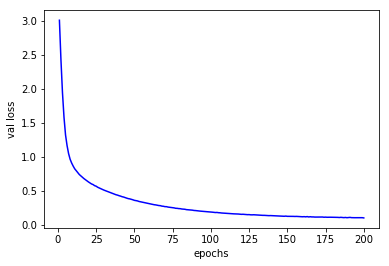

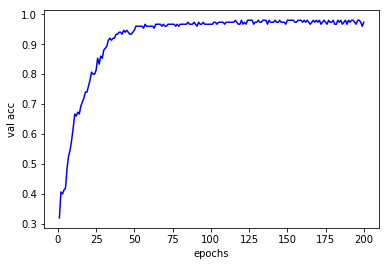

In [71]:
 
    
    # the point where curve is smooth is overfitting
val_loss=[]
train_loss=[]
acc=[]
val_acc=[]
np.random.seed(seed)
num_of_epochs=200
def model_define():
    model=Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model

skf=KFold(n_splits=10,shuffle=True, random_state=seed)
skf.get_n_splits(X,encoded_Y)
for train_index , test_index in skf.split(X, encoded_Y):
    model=model_define()
    history=model.fit(X[train_index],dummy_y[train_index],epochs=num_of_epochs,batch_size=5,verbose=1,
                     validation_data=(X[test_index],dummy_y[test_index]))
    val_loss.append(history.history['val_loss'])
    train_loss.append(history.history['loss'])
    acc.append(history.history['acc'])
    val_acc.append(history.history['val_acc'])

print('Accuracy is found to be {}'.format(np.mean(np.mean(val_acc,axis=0))))
train_acc=np.mean(acc,axis=0)
val_acc=np.mean(val_acc,axis=0)
val_loss=np.mean(val_loss,axis=0)
train_loss=np.mean(train_loss,axis=0)
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),val_loss,'b',label='val_loss')
plt.xlabel("epochs")
plt.ylabel("val loss")
plt.show()
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),val_acc,'b',label='val_acc')

plt.xlabel("epochs")
plt.ylabel("val acc")
plt.show()

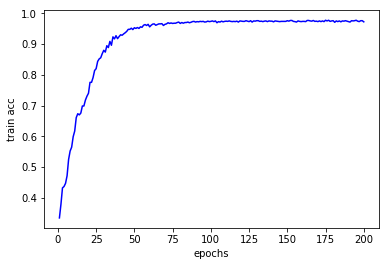

In [73]:
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),train_acc,'b',label='train_acc')

plt.xlabel("epochs")
plt.ylabel("train acc")
plt.show()

Train on 135 samples, validate on 15 samples
Epoch 1/90
135/135 [==============================] - 7s 51ms/step - loss: 1.2204 - acc: 0.3333 - val_loss: 1.2972 - val_acc: 0.3333
Epoch 2/90
135/135 [==============================] - 0s 1ms/step - loss: 1.1142 - acc: 0.4741 - val_loss: 1.2083 - val_acc: 0.4667
Epoch 3/90
135/135 [==============================] - 0s 1ms/step - loss: 1.0352 - acc: 0.6815 - val_loss: 1.1471 - val_acc: 0.4667
Epoch 4/90
135/135 [==============================] - 0s 1ms/step - loss: 0.9966 - acc: 0.6815 - val_loss: 1.1018 - val_acc: 0.4667
Epoch 5/90
135/135 [==============================] - 0s 1ms/step - loss: 0.9662 - acc: 0.6815 - val_loss: 1.0726 - val_acc: 0.4667
Epoch 6/90
135/135 [==============================] - 0s 1ms/step - loss: 0.9362 - acc: 0.6815 - val_loss: 1.0365 - val_acc: 0.4667
Epoch 7/90
135/135 [==============================] - 0s 1ms/step - loss: 0.9079 - acc: 0.6815 - val_loss: 1.0033 - val_acc: 0.4667
Epoch 8/90
135/135 [==========

135/135 [==============================] - 0s 1ms/step - loss: 0.3158 - acc: 0.9704 - val_loss: 0.3568 - val_acc: 0.9333
Epoch 63/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3119 - acc: 0.9630 - val_loss: 0.3614 - val_acc: 0.9333
Epoch 64/90
135/135 [==============================] - 0s 2ms/step - loss: 0.3093 - acc: 0.9704 - val_loss: 0.3595 - val_acc: 0.9333
Epoch 65/90
135/135 [==============================] - 0s 2ms/step - loss: 0.3075 - acc: 0.9407 - val_loss: 0.3534 - val_acc: 0.9333
Epoch 66/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3025 - acc: 0.9556 - val_loss: 0.3455 - val_acc: 0.9333
Epoch 67/90
135/135 [==============================] - 0s 2ms/step - loss: 0.2960 - acc: 0.9630 - val_loss: 0.3535 - val_acc: 0.9333
Epoch 68/90
135/135 [==============================] - 0s 2ms/step - loss: 0.2951 - acc: 0.9630 - val_loss: 0.3371 - val_acc: 0.9333
Epoch 69/90
135/135 [==============================] - 0s 2ms/step - loss: 0.2907

135/135 [==============================] - 0s 1ms/step - loss: 0.6501 - acc: 0.7185 - val_loss: 0.6705 - val_acc: 0.7333
Epoch 34/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6413 - acc: 0.7556 - val_loss: 0.6706 - val_acc: 0.6667
Epoch 35/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6326 - acc: 0.7259 - val_loss: 0.6652 - val_acc: 0.6667
Epoch 36/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6249 - acc: 0.7333 - val_loss: 0.6577 - val_acc: 0.6667
Epoch 37/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6162 - acc: 0.7556 - val_loss: 0.6572 - val_acc: 0.6667
Epoch 38/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6106 - acc: 0.7407 - val_loss: 0.6540 - val_acc: 0.6667
Epoch 39/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6009 - acc: 0.7407 - val_loss: 0.6462 - val_acc: 0.7333
Epoch 40/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5940

135/135 [==============================] - 0s 2ms/step - loss: 1.3757 - acc: 0.6741 - val_loss: 1.3055 - val_acc: 0.6000
Epoch 5/90
135/135 [==============================] - 0s 1ms/step - loss: 0.9750 - acc: 0.6741 - val_loss: 0.8997 - val_acc: 0.6000
Epoch 6/90
135/135 [==============================] - 0s 1ms/step - loss: 0.7457 - acc: 0.6741 - val_loss: 0.6894 - val_acc: 0.6000
Epoch 7/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6492 - acc: 0.6667 - val_loss: 0.6018 - val_acc: 0.6667
Epoch 8/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6042 - acc: 0.7556 - val_loss: 0.5687 - val_acc: 1.0000
Epoch 9/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5751 - acc: 0.8889 - val_loss: 0.5339 - val_acc: 1.0000
Epoch 10/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5534 - acc: 0.7852 - val_loss: 0.5088 - val_acc: 1.0000
Epoch 11/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5337 - ac

Epoch 66/90
135/135 [==============================] - 0s 2ms/step - loss: 0.1788 - acc: 0.9778 - val_loss: 0.1554 - val_acc: 1.0000
Epoch 67/90
135/135 [==============================] - 0s 2ms/step - loss: 0.1765 - acc: 0.9704 - val_loss: 0.1497 - val_acc: 1.0000
Epoch 68/90
135/135 [==============================] - 0s 2ms/step - loss: 0.1748 - acc: 0.9778 - val_loss: 0.1469 - val_acc: 1.0000
Epoch 69/90
135/135 [==============================] - 0s 1ms/step - loss: 0.1708 - acc: 0.9778 - val_loss: 0.1472 - val_acc: 1.0000
Epoch 70/90
135/135 [==============================] - 0s 1ms/step - loss: 0.1693 - acc: 0.9778 - val_loss: 0.1492 - val_acc: 1.0000
Epoch 71/90
135/135 [==============================] - 0s 1ms/step - loss: 0.1677 - acc: 0.9778 - val_loss: 0.1455 - val_acc: 1.0000
Epoch 72/90
135/135 [==============================] - 0s 1ms/step - loss: 0.1670 - acc: 0.9630 - val_loss: 0.1325 - val_acc: 1.0000
Epoch 73/90
135/135 [==============================] - 0s 1ms/step - 

135/135 [==============================] - 0s 1ms/step - loss: 0.3224 - acc: 0.9556 - val_loss: 0.2081 - val_acc: 1.0000
Epoch 38/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3200 - acc: 0.9407 - val_loss: 0.2026 - val_acc: 1.0000
Epoch 39/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3095 - acc: 0.9630 - val_loss: 0.1954 - val_acc: 1.0000
Epoch 40/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3031 - acc: 0.9630 - val_loss: 0.1887 - val_acc: 1.0000
Epoch 41/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2968 - acc: 0.9630 - val_loss: 0.1832 - val_acc: 1.0000
Epoch 42/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2913 - acc: 0.9630 - val_loss: 0.1768 - val_acc: 1.0000
Epoch 43/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2864 - acc: 0.9630 - val_loss: 0.1714 - val_acc: 1.0000
Epoch 44/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2794

135/135 [==============================] - 0s 2ms/step - loss: 1.6454 - acc: 0.3259 - val_loss: 1.5309 - val_acc: 0.4000
Epoch 8/90
135/135 [==============================] - 0s 1ms/step - loss: 1.5216 - acc: 0.3259 - val_loss: 1.4199 - val_acc: 0.4000
Epoch 9/90
135/135 [==============================] - 0s 1ms/step - loss: 1.4136 - acc: 0.3259 - val_loss: 1.3516 - val_acc: 0.4000
Epoch 10/90
135/135 [==============================] - 0s 1ms/step - loss: 1.3413 - acc: 0.2593 - val_loss: 1.2939 - val_acc: 0.2667
Epoch 11/90
135/135 [==============================] - 0s 1ms/step - loss: 1.2841 - acc: 0.0000e+00 - val_loss: 1.2524 - val_acc: 0.0000e+00
Epoch 12/90
135/135 [==============================] - 0s 1ms/step - loss: 1.2411 - acc: 0.0074 - val_loss: 1.2202 - val_acc: 0.0000e+00
Epoch 13/90
135/135 [==============================] - 0s 1ms/step - loss: 1.2112 - acc: 0.0741 - val_loss: 1.1984 - val_acc: 0.1333
Epoch 14/90
135/135 [==============================] - 0s 1ms/step - lo

135/135 [==============================] - 0s 1ms/step - loss: 0.7909 - acc: 0.6667 - val_loss: 0.7419 - val_acc: 0.7333
Epoch 69/90
135/135 [==============================] - 0s 1ms/step - loss: 0.7790 - acc: 0.6593 - val_loss: 0.7231 - val_acc: 0.7333
Epoch 70/90
135/135 [==============================] - 0s 1ms/step - loss: 0.7614 - acc: 0.6667 - val_loss: 0.7100 - val_acc: 0.7333
Epoch 71/90
135/135 [==============================] - 0s 1ms/step - loss: 0.7489 - acc: 0.6741 - val_loss: 0.6965 - val_acc: 0.7333
Epoch 72/90
135/135 [==============================] - 0s 1ms/step - loss: 0.7347 - acc: 0.6741 - val_loss: 0.6799 - val_acc: 0.7333
Epoch 73/90
135/135 [==============================] - 0s 1ms/step - loss: 0.7209 - acc: 0.6741 - val_loss: 0.6655 - val_acc: 0.7333
Epoch 74/90
135/135 [==============================] - 0s 1ms/step - loss: 0.7069 - acc: 0.6741 - val_loss: 0.6509 - val_acc: 0.7333
Epoch 75/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6932

135/135 [==============================] - ETA: 0s - loss: 0.3788 - acc: 0.884 - 0s 1ms/step - loss: 0.3930 - acc: 0.8963 - val_loss: 0.3385 - val_acc: 1.0000
Epoch 40/90
135/135 [==============================] - 0s 2ms/step - loss: 0.3884 - acc: 0.8889 - val_loss: 0.3345 - val_acc: 1.0000
Epoch 41/90
135/135 [==============================] - 0s 2ms/step - loss: 0.3836 - acc: 0.8815 - val_loss: 0.3332 - val_acc: 1.0000
Epoch 42/90
135/135 [==============================] - 0s 2ms/step - loss: 0.3815 - acc: 0.8667 - val_loss: 0.3234 - val_acc: 1.0000
Epoch 43/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3767 - acc: 0.8963 - val_loss: 0.3207 - val_acc: 1.0000
Epoch 44/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3709 - acc: 0.8963 - val_loss: 0.3222 - val_acc: 1.0000
Epoch 45/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3708 - acc: 0.8741 - val_loss: 0.3103 - val_acc: 1.0000
Epoch 46/90
135/135 [======================

135/135 [==============================] - 0s 1ms/step - loss: 0.6766 - acc: 0.5926 - val_loss: 0.5711 - val_acc: 0.7333
Epoch 11/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6496 - acc: 0.6296 - val_loss: 0.5439 - val_acc: 0.7333
Epoch 12/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6247 - acc: 0.6519 - val_loss: 0.5149 - val_acc: 0.8000
Epoch 13/90
135/135 [==============================] - 0s 1ms/step - loss: 0.6027 - acc: 0.6667 - val_loss: 0.4957 - val_acc: 0.8000
Epoch 14/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5857 - acc: 0.6963 - val_loss: 0.4740 - val_acc: 0.8667
Epoch 15/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5666 - acc: 0.7185 - val_loss: 0.4523 - val_acc: 0.8000
Epoch 16/90
135/135 [==============================] - 0s 2ms/step - loss: 0.5497 - acc: 0.7185 - val_loss: 0.4351 - val_acc: 0.8667
Epoch 17/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5332

135/135 [==============================] - 0s 2ms/step - loss: 0.2082 - acc: 0.9407 - val_loss: 0.0761 - val_acc: 1.0000
Epoch 72/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2059 - acc: 0.9481 - val_loss: 0.0741 - val_acc: 1.0000
Epoch 73/90
135/135 [==============================] - 0s 2ms/step - loss: 0.2051 - acc: 0.9556 - val_loss: 0.0732 - val_acc: 1.0000
Epoch 74/90
135/135 [==============================] - 0s 2ms/step - loss: 0.2008 - acc: 0.9481 - val_loss: 0.0705 - val_acc: 1.0000
Epoch 75/90
135/135 [==============================] - 0s 2ms/step - loss: 0.2008 - acc: 0.9333 - val_loss: 0.0690 - val_acc: 1.0000
Epoch 76/90
135/135 [==============================] - 0s 2ms/step - loss: 0.1953 - acc: 0.9481 - val_loss: 0.0675 - val_acc: 1.0000
Epoch 77/90
135/135 [==============================] - 0s 1ms/step - loss: 0.1944 - acc: 0.9481 - val_loss: 0.0646 - val_acc: 1.0000
Epoch 78/90
135/135 [==============================] - 0s 1ms/step - loss: 0.1907

135/135 [==============================] - 0s 1ms/step - loss: 0.4963 - acc: 0.8222 - val_loss: 0.4729 - val_acc: 0.7333
Epoch 43/90
135/135 [==============================] - 0s 2ms/step - loss: 0.4935 - acc: 0.8296 - val_loss: 0.4647 - val_acc: 0.8667
Epoch 44/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4857 - acc: 0.7852 - val_loss: 0.4613 - val_acc: 0.7333
Epoch 45/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4774 - acc: 0.8519 - val_loss: 0.4549 - val_acc: 0.8667
Epoch 46/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4724 - acc: 0.8296 - val_loss: 0.4500 - val_acc: 0.8667
Epoch 47/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4664 - acc: 0.8741 - val_loss: 0.4470 - val_acc: 0.8667
Epoch 48/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4622 - acc: 0.8889 - val_loss: 0.4423 - val_acc: 0.8667
Epoch 49/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4591

135/135 [==============================] - 0s 1ms/step - loss: 0.5198 - acc: 0.7704 - val_loss: 0.5551 - val_acc: 0.7333
Epoch 14/90
135/135 [==============================] - 0s 1ms/step - loss: 0.5083 - acc: 0.8074 - val_loss: 0.5412 - val_acc: 0.7333
Epoch 15/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4980 - acc: 0.7481 - val_loss: 0.5370 - val_acc: 0.7333
Epoch 16/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4874 - acc: 0.8222 - val_loss: 0.5229 - val_acc: 0.7333
Epoch 17/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4825 - acc: 0.8593 - val_loss: 0.5040 - val_acc: 0.8667
Epoch 18/90
135/135 [==============================] - 0s 2ms/step - loss: 0.4693 - acc: 0.8148 - val_loss: 0.5079 - val_acc: 0.7333
Epoch 19/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4639 - acc: 0.8148 - val_loss: 0.4924 - val_acc: 0.8667
Epoch 20/90
135/135 [==============================] - 0s 1ms/step - loss: 0.4552

135/135 [==============================] - 0s 1ms/step - loss: 0.2290 - acc: 0.9630 - val_loss: 0.2374 - val_acc: 1.0000
Epoch 75/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2262 - acc: 0.9481 - val_loss: 0.2247 - val_acc: 1.0000
Epoch 76/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2187 - acc: 0.9630 - val_loss: 0.2279 - val_acc: 1.0000
Epoch 77/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2179 - acc: 0.9630 - val_loss: 0.2223 - val_acc: 1.0000
Epoch 78/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2122 - acc: 0.9778 - val_loss: 0.2212 - val_acc: 1.0000
Epoch 79/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2118 - acc: 0.9704 - val_loss: 0.2155 - val_acc: 1.0000
Epoch 80/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2095 - acc: 0.9556 - val_loss: 0.2156 - val_acc: 1.0000
Epoch 81/90
135/135 [==============================] - 0s 1ms/step - loss: 0.2052

135/135 [==============================] - 0s 1ms/step - loss: 0.3719 - acc: 0.9333 - val_loss: 0.4507 - val_acc: 0.8667
Epoch 46/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3695 - acc: 0.9333 - val_loss: 0.4486 - val_acc: 0.8667
Epoch 47/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3653 - acc: 0.9407 - val_loss: 0.4478 - val_acc: 0.8667
Epoch 48/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3633 - acc: 0.9333 - val_loss: 0.4396 - val_acc: 0.8667
Epoch 49/90
135/135 [==============================] - 0s 2ms/step - loss: 0.3579 - acc: 0.9481 - val_loss: 0.4394 - val_acc: 0.8000
Epoch 50/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3551 - acc: 0.9407 - val_loss: 0.4361 - val_acc: 0.8000
Epoch 51/90
135/135 [==============================] - 0s 2ms/step - loss: 0.3505 - acc: 0.9630 - val_loss: 0.4334 - val_acc: 0.8000
Epoch 52/90
135/135 [==============================] - 0s 1ms/step - loss: 0.3497

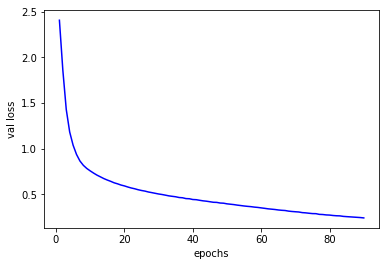

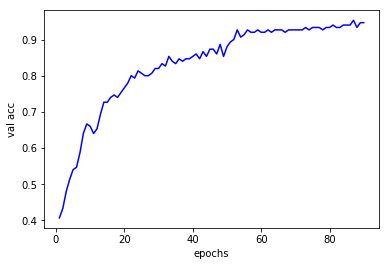

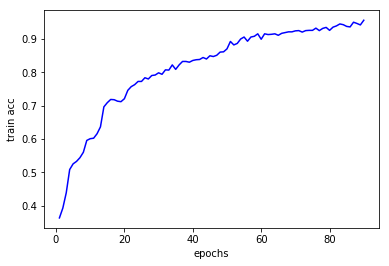

In [76]:
val_loss=[]
train_loss=[]
acc=[]
val_acc=[]
np.random.seed(seed)
num_of_epochs=90
def model_define():
    model=Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model
skf=KFold(n_splits=10,shuffle=True, random_state=seed)
skf.get_n_splits(X,encoded_Y)
for train_index , test_index in skf.split(X, encoded_Y):
    model=model_define()
    history=model.fit(X[train_index],dummy_y[train_index],epochs=num_of_epochs,batch_size=5,verbose=1,
                     validation_data=(X[test_index],dummy_y[test_index]))
    val_loss.append(history.history['val_loss'])
    train_loss.append(history.history['loss'])
    acc.append(history.history['acc'])
    val_acc.append(history.history['val_acc'])
    
print('Accuracy is found to be {}'.format(np.mean(np.mean(val_acc,axis=0))))
train_acc=np.mean(acc,axis=0)
val_acc=np.mean(val_acc,axis=0)
val_loss=np.mean(val_loss,axis=0)
train_loss=np.mean(train_loss,axis=0)
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),val_loss,'b',label='val_loss')
plt.xlabel("epochs")
plt.ylabel("val loss")
plt.show()
from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),val_acc,'b',label='val_acc')

plt.xlabel("epochs")
plt.ylabel("val acc")
plt.show()

from matplotlib import pyplot as plt

plt.plot(np.arange(1,num_of_epochs+1),train_acc,'b',label='train_acc')

plt.xlabel("epochs")
plt.ylabel("train acc")
plt.show()

In [58]:
#larger model
def create_larger():
	# create model
    model=Sequential()
    model.add(Dense(16, activation='relu', input_shape=(4,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
	# Compile model, write code below
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [59]:
estimator = KerasClassifier(build_fn=create_larger, epochs=210, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Results: 96.00% (5.33%)


In [60]:
#functional api

# baseline model
def create_baseline():
	# create model, write code below
    import keras
    from keras import layers
    
    inputs=keras.Input(shape=(4,))
    x=layers.Dense(8, activation='relu')(inputs)
  #  x=layers.Dense(8, activation='relu')(x)
    outputs=layers.Dense(3, activation='softmax')(x)
    
    model=keras.Model(inputs, outputs)
	# Compile model, write code below
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [61]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 97.33% (4.42%)


In [62]:
def create_smaller():
	# create model
    inputs=keras.Input(shape=(4,))
    x=Dense(4, activation='relu')(inputs)
   # x=Dense(4, activation='relu')(x)
    outputs=Dense(3, activation='softmax')(x)
    
    model=keras.Model(inputs,outputs)
	# Compile model, write code below
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [63]:
estimator = KerasClassifier(build_fn=create_smaller, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 94.67% (7.18%)


In [64]:
def create_larger():
	# create model
    inputs=keras.Input(shape=(4,))
    x=Dense(16, activation='relu')(inputs)
    x=Dense(8, activation='relu')(x)
    #x=Dense(8, activation='relu')(x)
    outputs=Dense(3, activation='softmax')(x)
    
    model=keras.Model(inputs,outputs)
	# Compile model, write code below
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [65]:
estimator = KerasClassifier(build_fn=create_larger, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 96.67% (4.47%)


In [77]:
#model subclassing
# baseline model
import tensorflow as tf
def create_baseline():
	# create model, write code below
    from keras import layers
    
    class MyModel(tf.keras.Model):
    
        def __init__(self,num_classes=3):
            super(MyModel, self).__init__()
            self.num_classes = num_classes
            self.dense1=layers.Dense(8, activation='relu')
            #self.dense2=layers.Dense(8, activation='relu')
            self.dense3=layers.Dense(num_classes, activation='softmax')
            
        def call(self,inputs):
            x= self.dense1(inputs)
            return self.dense3(x)
    
    model=MyModel(num_classes=3)
    
	# Compile model, write code below
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [78]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Results: 37.33% (13.73%)


In [81]:
import tensorflow as tf
def create_smaller():
	# create model, write code below
    from keras import layers
    
    class MyModel(tf.keras.Model):
    
        def __init__(self,num_classes=3):
            super(MyModel, self).__init__()
            self.num_classes = num_classes
            self.dense1=layers.Dense(4, activation='relu')
          #  self.dense2=layers.Dense(4, activation='relu')
            self.dense3=layers.Dense(num_classes, activation='softmax')
            
        def call(self,inputs):
            x= self.dense1(inputs)
        
            return self.dense3(x)
    
    model=MyModel(num_classes=3)
    
	# Compile model, write code below
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [82]:
estimator = KerasClassifier(build_fn=create_smaller, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Results: 32.67% (5.54%)


In [83]:
def create_larger():
	# create model, write code below
    from keras import layers
    
    class MyModel(tf.keras.Model):
    
        def __init__(self,num_classes=3):
            super(MyModel, self).__init__()
            self.num_classes = num_classes
            self.dense1=layers.Dense(16, activation='relu')
            self.dense2=layers.Dense(8, activation='relu')
           # self.dense2=layers.Dense(8, activation='relu')
            self.dense3=layers.Dense(num_classes, activation='softmax')
            
        def call(self,inputs):
            x= self.dense1(inputs)
            x=self.dense2(x)
            return self.dense3(x)
    
    model=MyModel(num_classes=3)
    
	# Compile model, write code below
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [84]:
estimator = KerasClassifier(build_fn=create_larger, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Results: 35.33% (17.40%)


In [90]:

import numpy as np
k=10
num_val_samples = len(X) // k
num_epochs = 200
val_loss=[]
val_acc=[]
for i in range(k):
    print('processing fold #', i)
    val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = encoded_Y[i* num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([X[:i * num_val_samples],
                                         X[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([encoded_Y[:i*num_val_samples],
                                            encoded_Y[(i + 1) * num_val_samples:]],axis=0)
    
    model=create_baseline()
    history=model.fit(partial_train_data,partial_train_targets,shuffle=True,epochs=10,
                      batch_size=5,verbose=0)
    sys=model.evaluate(val_data,val_targets,verbose=0)
    val_loss.append(sys[0])
    val_acc.append(sys[1])

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [91]:
print(np.mean(val_loss))

7.153080320358276


In [92]:
np.mean(val_acc)
    


0.5933333337306976

In [54]:
for i in range(10):
    print(val_acc[i])
    
    


0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
